In [1]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")
include("c:/Users/lisah/Documents/Repos/ma-code/src/src.jl")
using Distributions, Plots

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


In [2]:
# simulate time window up to M
M = 50;

## Local Sensitivity Analysis on priors

First, perform a local sensitivity analysis on the priors of all parameters to see which are the most influential to the model output.

In [3]:
# compute 100 samples
n = 200

# fixed parameter values
a = mean([0.94,2.81]) # suggested by Klausmeier paper
m = 0.45 # suggested by Klausmeier paper
n0 = 1.0 # no source
w0 = 1.0 # no source
noise = 0.0

0.0

### sensitivity of a

In [4]:
# sensitivity of a
prior_a = Uniform(0.94,2.81)
samples_a = rand(prior_a,n)

# store for plotting
n_traj_sampled = []
w_traj_sampled = []

# for each sample solve klausmeier model
for a in samples_a
    hprm = Src.Hyperprm(w0,n0,a,m,M,noise)
    sol = Src.sol_klausmeier(hprm)
    sol = Src.randomize_data(sol, hprm.noise)
    push!(n_traj_sampled, sol[!,"n"])
    push!(w_traj_sampled, sol[!,"w"])
end

n_mean = mean(n_traj_sampled, dims=1)
w_mean = mean(w_traj_sampled, dims=1)
times = range(1, M);

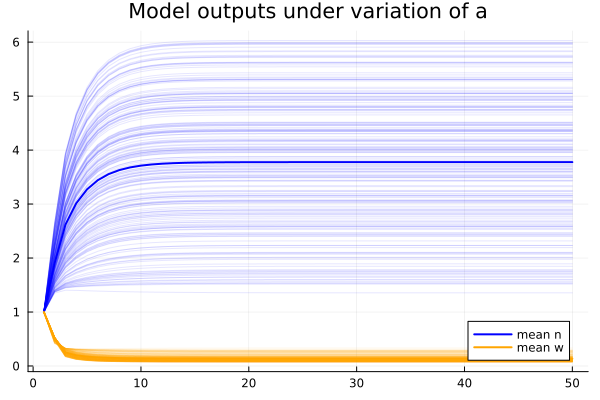

In [5]:
plot(times, n_mean, label="mean n", lw=2, color=:blue, legend=:bottomright, title="Model outputs under variation of a")
for i in range(1, n)
    plot!(times,n_traj_sampled[i], color=:blue, alpha=0.1, label="")
    plot!(times,w_traj_sampled[i], color=:orange, alpha=0.1,label="")
end
plot_a = plot!(times, w_mean, label="mean w", lw=2, color=:orange)

we conclude that the biomass trajectory is very sensitive to variation in a, whereas the water compartment is barely affected by it.

### sensitivity of m

In [6]:
# sensitivity of m
prior_m = Uniform(0.45-0.45*0.2,0.45+0.45*0.2)
samples_m = rand(prior_a,n)

# store for plotting
n_traj_sampled = []
w_traj_sampled = []

# for each sample solve klausmeier model
for m in samples_m
    hprm = Src.Hyperprm(w0,n0,a,m,M, noise)
    sol = Src.sol_klausmeier(hprm)
    sol = Src.randomize_data(sol, hprm.noise)
    push!(n_traj_sampled, sol[!,"n"])
    push!(w_traj_sampled, sol[!,"w"])
end

n_mean = mean(n_traj_sampled, dims=1)
w_mean = mean(w_traj_sampled, dims=1)
times = range(1, M);

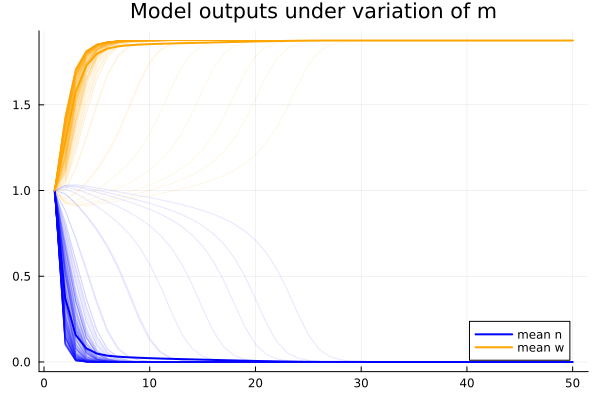

In [7]:
plot(times, n_mean, label="mean n", lw=2, color=:blue, legend=:bottomright, title="Model outputs under variation of m")
for i in range(1, n)
    plot!(times,n_traj_sampled[i], color=:blue, alpha=0.1, label="")
    plot!(times,w_traj_sampled[i], color=:orange, alpha=0.1,label="")
end
plot_m = plot!(times, w_mean, label="mean w", lw=2, color=:orange)

### sensitivity of n0

In [8]:
# sensitivity of n0
prior_n0 = Uniform(0.5,1.5)
samples_n0 = rand(prior_a,n)

# store for plotting
n_traj_sampled = []
w_traj_sampled = []

# for each sample solve klausmeier model
for m in samples_n0
    hprm = Src.Hyperprm(w0,n0,a,m,M,noise)
    sol = Src.sol_klausmeier(hprm)
    sol = Src.randomize_data(sol, hprm.noise)
    push!(n_traj_sampled, sol[!,"n"])
    push!(w_traj_sampled, sol[!,"w"])
end

n_mean = mean(n_traj_sampled, dims=1)
w_mean = mean(w_traj_sampled, dims=1)
times = range(1, M);

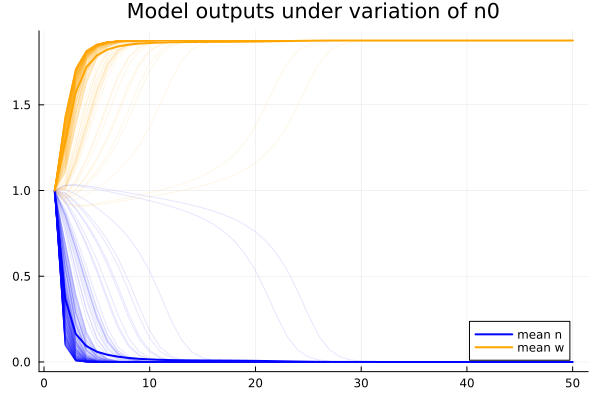

In [9]:
plot(times, n_mean, label="mean n", lw=2, color=:blue, legend=:bottomright, title="Model outputs under variation of n0")
for i in range(1, n)
    plot!(times,n_traj_sampled[i], color=:blue, alpha=0.1, label="")
    plot!(times,w_traj_sampled[i], color=:orange, alpha=0.1,label="")
end
plot_n0 = plot!(times, w_mean, label="mean w", lw=2, color=:orange)

### sensitivity of w0

In [10]:
# sensitivity of n0
prior_w0 = Uniform(0.5,1.5)
samples_w0 = rand(prior_a,n)

# store for plotting
n_traj_sampled = []
w_traj_sampled = []

# for each sample solve klausmeier model
for m in samples_w0
    hprm = Src.Hyperprm(w0,n0,a,m,M,noise)
    sol = Src.sol_klausmeier(hprm)
    sol = Src.randomize_data(sol, hprm.noise)
    push!(n_traj_sampled, sol[!,"n"])
    push!(w_traj_sampled, sol[!,"w"])
end

n_mean = mean(n_traj_sampled, dims=1)
w_mean = mean(w_traj_sampled, dims=1)
times = range(1, M);

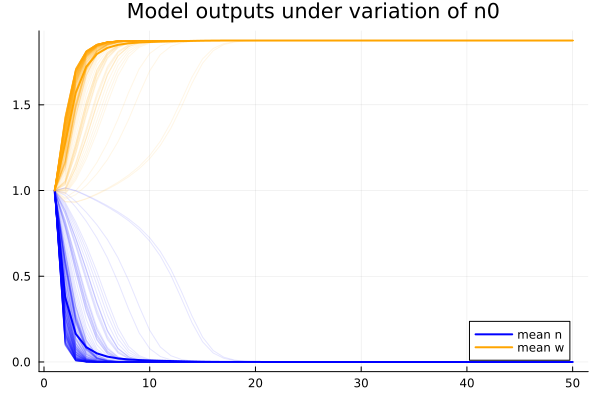

In [11]:
plot(times, n_mean, label="mean n", lw=2, color=:blue, legend=:bottomright, title="Model outputs under variation of n0")
for i in range(1, n)
    plot!(times,n_traj_sampled[i], color=:blue, alpha=0.1, label="")
    plot!(times,w_traj_sampled[i], color=:orange, alpha=0.1,label="")
end
plot_w0 = plot!(times, w_mean, label="mean w", lw=2, color=:orange)

## Compare all

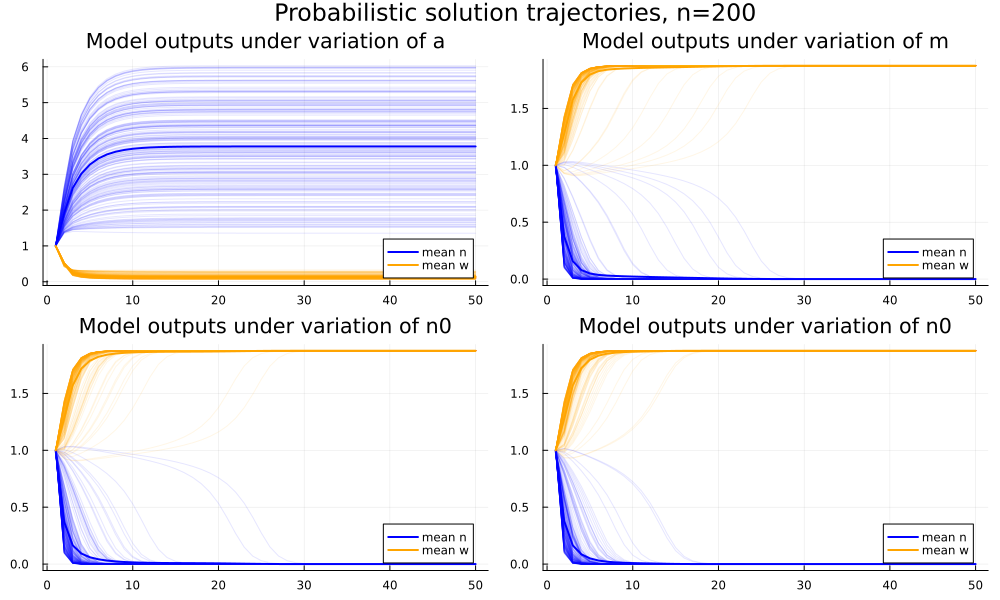

In [14]:
plot(plot_a, plot_m, plot_n0, plot_w0, layout=(2,2), size=(1000,600), suptitle="Probabilistic solution trajectories, n=$n")